#Market Basket Analysis
**Step 1: Loading The Necessary Libraries**

In this project, we will use the libraries **arules**, **arulesViz**, and **readr**


In [ ]:
chooseCRANmirror(graphics = FALSE, ind = 1)
install.packages("arules", repos="https://cloud.r-project.org/")
install.packages("arulesViz", repos="https://cloud.r-project.org/")
install.packages("readr", repos="https://cloud.r-project.org/")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘graphlayouts’, ‘ggraph’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(arules)
library(arulesViz)
library(readr)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




**Step 2: Loading The Dataset**




In [14]:
groceries <- read.transactions("groceries.csv", sep = ",")

In [16]:
summary(groceries)

transactions as itemMatrix in sparse format with
 9835 rows (elements/itemsets/transactions) and
 169 columns (items) and a density of 0.02609146 

most frequent items:
      whole milk other vegetables       rolls/buns             soda 
            2513             1903             1809             1715 
          yogurt          (Other) 
            1372            34055 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2159 1643 1299 1005  855  645  545  438  350  246  182  117   78   77   55   46 
  17   18   19   20   21   22   23   24   26   27   28   29   32 
  29   14   14    9   11    4    6    1    1    1    1    3    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   4.409   6.000  32.000 

includes extended item information - examples:
            labels
1 abrasive cleaner
2 artif. sweetener
3   baby cosmetics

**Interpretations:**

-  The density value of 0.02609146 (2.6 percent) refers to the proportion of non-zero matrix cells. Since there are 9835 * 169 = 1662115 positions in the matrix, we can calculate that a total of 1662115 * 0.02609146 = 43367 items were purchased during the store's 30 days of operation (assuming no duplicate items were purchased).

- A total of 2,159 transactions contained only a single item, while one transaction had 32 items.
- The first quartile and median purchase size are 2 and 3 items respectively, implying that 25 percent of transactions contained two or fewer items and about half contained more or less than three items.

**Visualization**

 To present these statistics visually, use the **itemFrequencyPlot()** function.

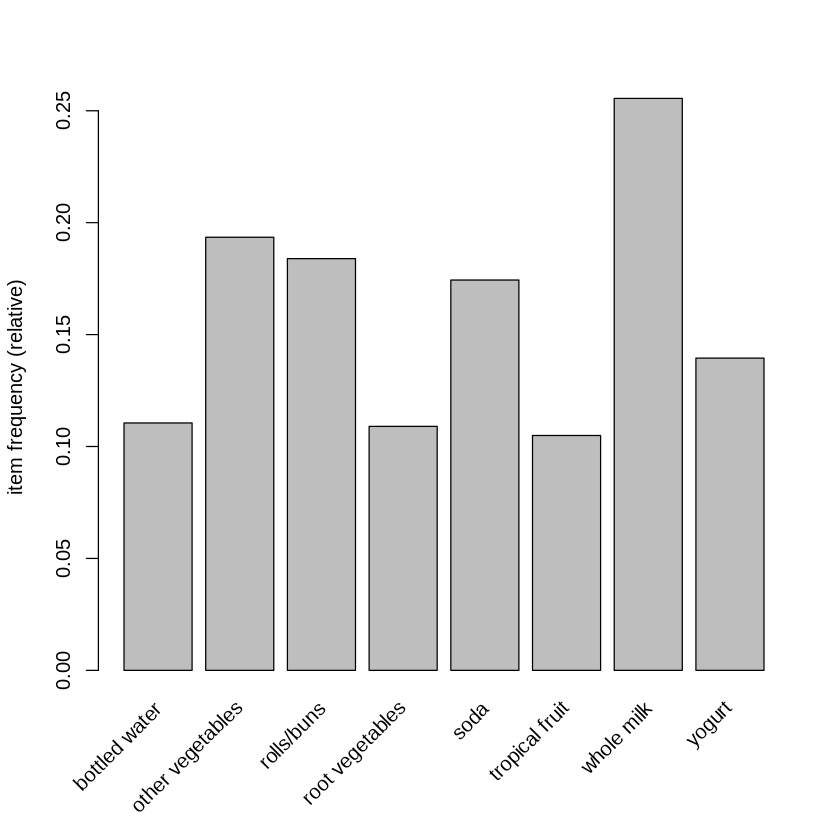

In [20]:
itemFrequencyPlot(groceries, support = 0.1)

This results in a histogram showing the eight items in the groceries data with at least 10 percent support.

 If we would rather limit the plot to a specific number of items, the topN parameter can be used with itemFrequencyPlot():

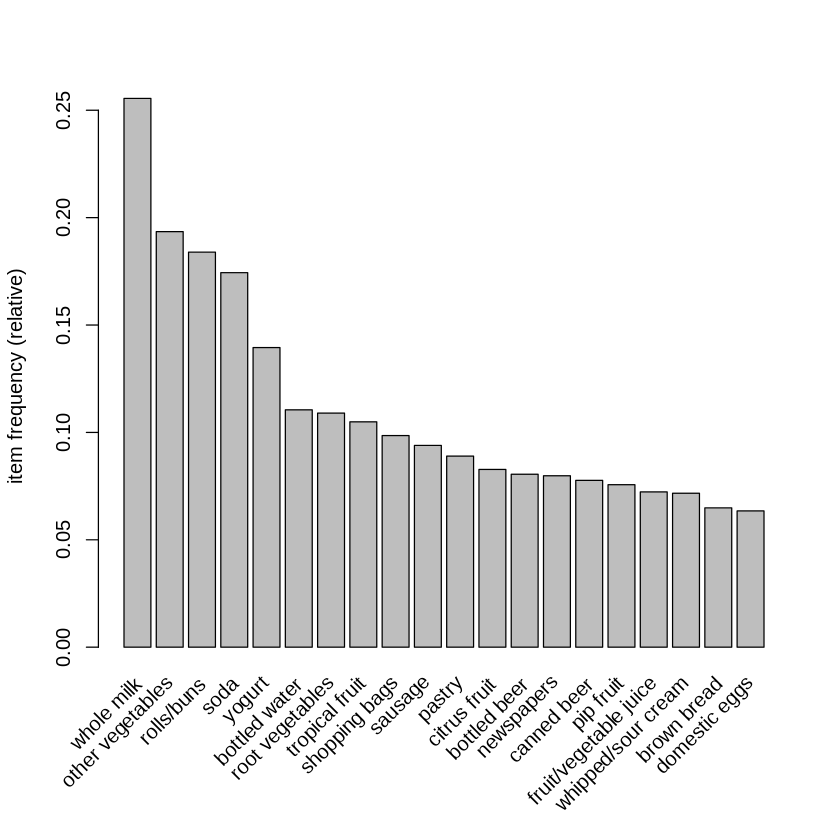

In [23]:
itemFrequencyPlot(groceries, topN=20)

In addition to looking at items, it's also possible to visualize the entire sparse matrix.
To do so, use the **image()** function.

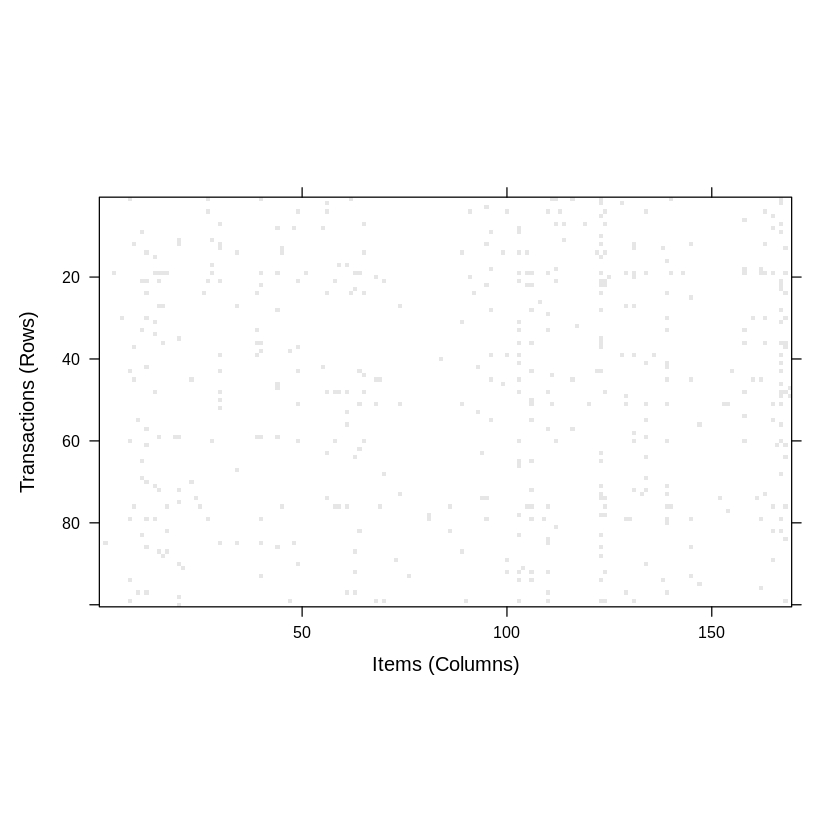

In [24]:
image(sample(groceries, 100))

**Step 3: Apply the Apriori Algorithm**


In [25]:
groceryrules <- apriori(groceries, parameter = list(support = 0.006, confidence = 0.25, minlen = 2))
groceryrules

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.25    0.1    1 none FALSE            TRUE       5   0.006      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 59 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.01s].
sorting and recoding items ... [109 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 4 done [0.01s].
writing ... [463 rule(s)] done [0.00s].
creating S4 object  ... done [0.01s].


set of 463 rules 

 Our groceryrules object contains a set of 463 association rules. To determine
whether any of them are useful, we'll have to dig deeper.

**Step 4: Model Performance Evaluation**

In [26]:
summary(groceryrules)

set of 463 rules

rule length distribution (lhs + rhs):sizes
  2   3   4 
150 297  16 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   2.000   3.000   2.711   3.000   4.000 

summary of quality measures:
    support           confidence        coverage             lift       
 Min.   :0.006101   Min.   :0.2500   Min.   :0.009964   Min.   :0.9932  
 1st Qu.:0.007117   1st Qu.:0.2971   1st Qu.:0.018709   1st Qu.:1.6229  
 Median :0.008744   Median :0.3554   Median :0.024809   Median :1.9332  
 Mean   :0.011539   Mean   :0.3786   Mean   :0.032608   Mean   :2.0351  
 3rd Qu.:0.012303   3rd Qu.:0.4495   3rd Qu.:0.035892   3rd Qu.:2.3565  
 Max.   :0.074835   Max.   :0.6600   Max.   :0.255516   Max.   :3.9565  
     count      
 Min.   : 60.0  
 1st Qu.: 70.0  
 Median : 86.0  
 Mean   :113.5  
 3rd Qu.:121.0  
 Max.   :736.0  

mining info:
      data ntransactions support confidence
 groceries          9835   0.006       0.25
                                                    

**Interpretation:**
- The rule length distribution tells us how many rules have each count of items. In our rule set, 150 rules have only two items, while 297 have three, and 16 have four.
- In the summary of quality measures, we can see that the minimum confidence and support levels (0.006 and 0.25 respectively) corresponds to the parameter settings in the  apriori fucntion. However, we might be alarmed if most or all of the rules were very near the minimum thresholds—not the case here.
- The third column, *lift*, is a metric we have not considered yet. It is a measure of how much more likely one item is to be purchased relative to its typical purchase rate, given that you know another item has been purchased. T

 We can take a look at specific rules using the inspect() function.
 For instance, the first three rules in the groceryrules object can be viewed as follows:

In [27]:
 inspect(groceryrules[1:3])

    lhs                rhs               support     confidence coverage  
[1] {potted plants} => {whole milk}      0.006914082 0.4000000  0.01728521
[2] {pasta}         => {whole milk}      0.006100661 0.4054054  0.01504830
[3] {herbs}         => {root vegetables} 0.007015760 0.4312500  0.01626843
    lift     count
[1] 1.565460 68   
[2] 1.586614 60   
[3] 3.956477 69   


The columns indicated by lhs and rhs refer to the left-hand side (LHS) and  
right-hand side (RHS) of the rule.

The LHS is the condition that needs to be  met in order to trigger the rule, and the RHS is the expected result of meeting that condition.

However, not all rules are useful (e.g. the first rule: {potted plants} =>
{whole milk} ); there doesn't seem to be
a logical reason why someone would be more likely to buy milk with a potted plant.

 A common approach is to take the result of learning association rules and divide
them into three categories:
 - Actionable
 - Trivial
 - Inexplicable

Our goal would be to find **actionable** associations that provides an insightful discovery.

Given enough time, one could evaluate each of the 463 rules to find the gems. However, the one performing the market
basket analysis may not be the best judge of whether a rule is actionable, trivial, or inexplicable.

**Step 5: Model Performance Improvement**

*1- Sorting the set of association rules*

Depending upon the objectives of the market basket analysis, the most useful rules
might be those with the highest support, confidence, or lift. The arules package
includes a **sort()** function that can be used to reorder the list of rules so that those
with the highest or lowest values of the quality measure come first

In [28]:
inspect(sort(groceryrules, by = "lift")[1:5])

    lhs                    rhs                      support confidence   coverage     lift count
[1] {herbs}             => {root vegetables}    0.007015760  0.4312500 0.01626843 3.956477    69
[2] {berries}           => {whipped/sour cream} 0.009049314  0.2721713 0.03324860 3.796886    89
[3] {other vegetables,                                                                          
     tropical fruit,                                                                            
     whole milk}        => {root vegetables}    0.007015760  0.4107143 0.01708185 3.768074    69
[4] {beef,                                                                                      
     other vegetables}  => {root vegetables}    0.007930859  0.4020619 0.01972547 3.688692    78
[5] {other vegetables,                                                                          
     tropical fruit}    => {pip fruit}          0.009456024  0.2634561 0.03589222 3.482649    93


These rules are more interesting than the ones we got previously.
- The first of these rules, with a lift of 3956477, indicates that customers who buy herbs are nearly four times as likely to buy root vegetables as is the typical customer—perhaps as part of some kind of stew?
- Rule two is intriguing. Whipped cream is more than three times more likely to appear in a cart with berries compared to other carts, and it may indicate perhaps a dessert combination

*2- Taking Subsets of association rules*


In [30]:
berryrules <- subset(groceryrules, items %in% "berries")
inspect(berryrules)

    lhs          rhs                  support     confidence coverage  lift    
[1] {berries} => {whipped/sour cream} 0.009049314 0.2721713  0.0332486 3.796886
[2] {berries} => {yogurt}             0.010574479 0.3180428  0.0332486 2.279848
[3] {berries} => {other vegetables}   0.010269446 0.3088685  0.0332486 1.596280
[4] {berries} => {whole milk}         0.011794611 0.3547401  0.0332486 1.388328
    count
[1]  89  
[2] 104  
[3] 101  
[4] 116  


There are four rules involving berries, two of which seem interesting enough to qualify as being actionable. In addition to whipped cream, berries are purchased in supermarkets with yogurt frequently—a pairing which would be appropriate for both lunch or breakfast and dessert.

**Conclusion:**

Association rules form a part of the **Big Data** solution. As an **unsupervised
learning** algorithm, they are able to learn and infer from large databases
without prior knowledge of what to search for. The catch is that it requires some effort to reduce the wealth of information into a smaller and more manageable subset
results.
